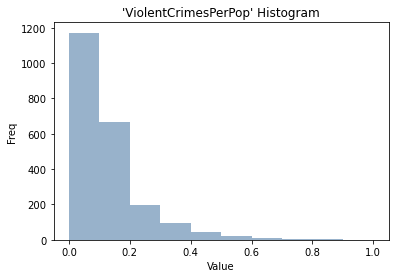

(1549, 100)
(665, 100)


In [342]:
%run alt_Preprocessing.ipynb

In [343]:
len(x_train)

1549

In [344]:
# Import packages
import sklearn.feature_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV # RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import pandas as pd

In [345]:
x_train = x_train
y_train = y_train
x_test = x_test #final valication with the kfold
y_test = y_test #final valication with the kfold

**Feature Selection**
- Build the model using the pre-processed data

In order to avoid overfitting and slow computing (due to the increase in features from dummying as well as increasing dimensionality), selecting the most important features is important. 


In [346]:
# select k best is a univariate method for feature selection:
# looks at the outcome and the relationship with each feature and selects k number of best features 
select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(x_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [x.columns[I] for I in indices_selected]

x_train_selected = x_train[colnames_selected]
x_test_selected = x_test[colnames_selected]

colnames_selected # 20 features selected

['PctKids2Par',
 'racePctWhite',
 'PctKidsBornNeverMar',
 'PctFam2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'racepctblack',
 'pctWInvInc',
 'pctWPubAsst',
 'PctPersOwnOccup',
 'PctPopUnderPov',
 'FemalePctDiv',
 'PctNotHSGrad',
 'PctHousNoPhone',
 'TotalPctDiv',
 'MalePctDivorce',
 'PctPersDenseHous',
 'PctHousOwnOcc',
 'PctHousLess3BR',
 'medFamInc']

**Build Decision tree #1**

Firstly, we create a basic DecisionTreeClassifier, and then will slowly tune the parameters, firstly, we need to look at the **max depth**. The cell below will calcaulate the accuracy score for a max depth up to *n*. This is then plotted in a bar graph.

For each parameter, we need to create a k-means loop, that then plots the overall figure. 


In [347]:
kf =KFold(n_splits=j, shuffle=True, random_state=42)
score = cross_val_score(tree.DecisionTreeClassifier(criterion='entropy', max_depth=i), x_train, y_train, cv= kf, scoring="accuracy")
print(score.mean())

kf =KFold(n_splits=j, shuffle=True, random_state=42)
score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini', max_depth=i), x_train, y_train, cv= kf, scoring="accuracy")
print(score.mean())

nan
nan


C:\Users\Windows10Pro\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Windows10Pro\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Windows10Pro\anaconda3\envs\ml\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\Windows10Pro\anaconda3\envs\ml\lib\site-packages\sklearn\tree\_classes.py", line 276, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Windows10Pro\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score

(0.8, 0.86)

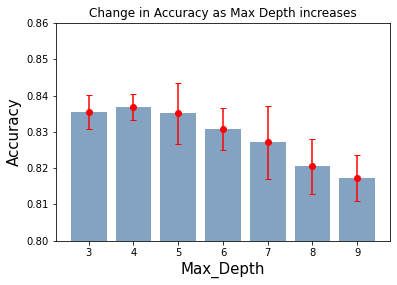

In [348]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

def get_max_depth(n):
    scores ={}
    x = list()
    y = list()
    error = list()
    
    for i in range(3,n): #first create a for loop for each max depth
        value_of_j = [] #this will take the average score for each value of k
        
        for j in range(2,10): #create a for loop for each kfold
            kf =KFold(n_splits=j, shuffle=True, random_state=42)
            score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini', max_depth=i), x_train, y_train, cv= kf, scoring="accuracy")
            value_of_j.append(score.mean())
            
        res = {str(i): value_of_j}
        scores.update(res) # for each max_depth, the average k_fold score
  
    return scores
            
d_max_depth = get_max_depth(10)

import numpy as np
import statistics 
x =[]
y =[]
error = []
for key, value in d_max_depth.items():
    x.append(key)
    y.append(sum(value)/len(value))
    error.append(statistics.stdev(value))
    
xfit = np.linspace(0, 10, 1000)
# plt.plot(x, error, 'or')
plt.bar(x, y, color=(0.2, 0.4, 0.6, 0.6))
plt.errorbar(x, y, yerr = error, barsabove = False, fmt='o', capsize=3, color='red')
#plt.errorbar(x, y, yerr = error, ls='-.', fmt='o', capsize=3)
plt.xlabel('Max_Depth', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Change in Accuracy as Max Depth increases')
plt.ylim(0.8, 0.86)

For this dataset, we have shown that the max_depth at 6 provides the highest accuracy. Therefore, the current model is:

In [349]:
from sklearn.metrics import roc_curve, auc
scores ={}
x = list()
y = list()
error = list()

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

for i in min_samples_splits: #first create a for loop for each max depth
    value_of_j = [] #this will take the average score for each value of k

    for j in range(2,10): #create a for loop for each kfold
        kf =KFold(n_splits=j, shuffle=True, random_state=42)
        score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=3, min_samples_split = i), x_train, y_train, cv= kf, scoring="accuracy")
        value_of_j.append(score.mean())

    res = {str(i): value_of_j}
    scores.update(res) # for each max_depth, the average k_fold score

get_min_sample_split = scores



(0.0, 1.1)

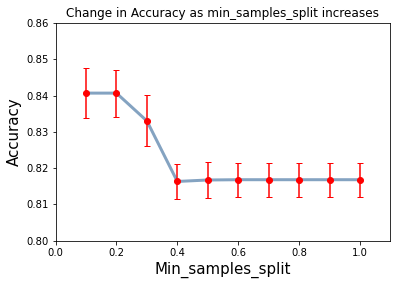

In [350]:
import numpy as np
import statistics 
x =[]
y =[]
error = []
for key, value in get_min_sample_split.items():
    x.append(key)
    y.append(sum(value)/len(value))
    error.append(statistics.stdev(value))
    
x = [round(float(i),2) for i in x]
    
# plt.plot(x, error, 'or')
plt.plot(x, y, color=(0.2, 0.4, 0.6, 0.6), lw=3)
plt.errorbar(x, y, yerr = error, barsabove = False, fmt='o', capsize=3, color='red')
#plt.errorbar(x, y, yerr = error, ls='-.', fmt='o', capsize=3)
plt.xlabel('Min_samples_split', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Change in Accuracy as min_samples_split increases')
plt.ylim(0.8, 0.86)
plt.xlim(0,1.1)

In [351]:
dtree = DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=6, min_samples_split =0.1)
dtree = dtree.fit(x_train, y_train)
#tree.plot_tree(dtree, feature_names=data.columns) 

# model can then be used to predict !
# crime_predict = dtree.predict([[0,1]])

y_pred = dtree.predict(x_test)  # Predict the response for test dataset
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8406015037593985


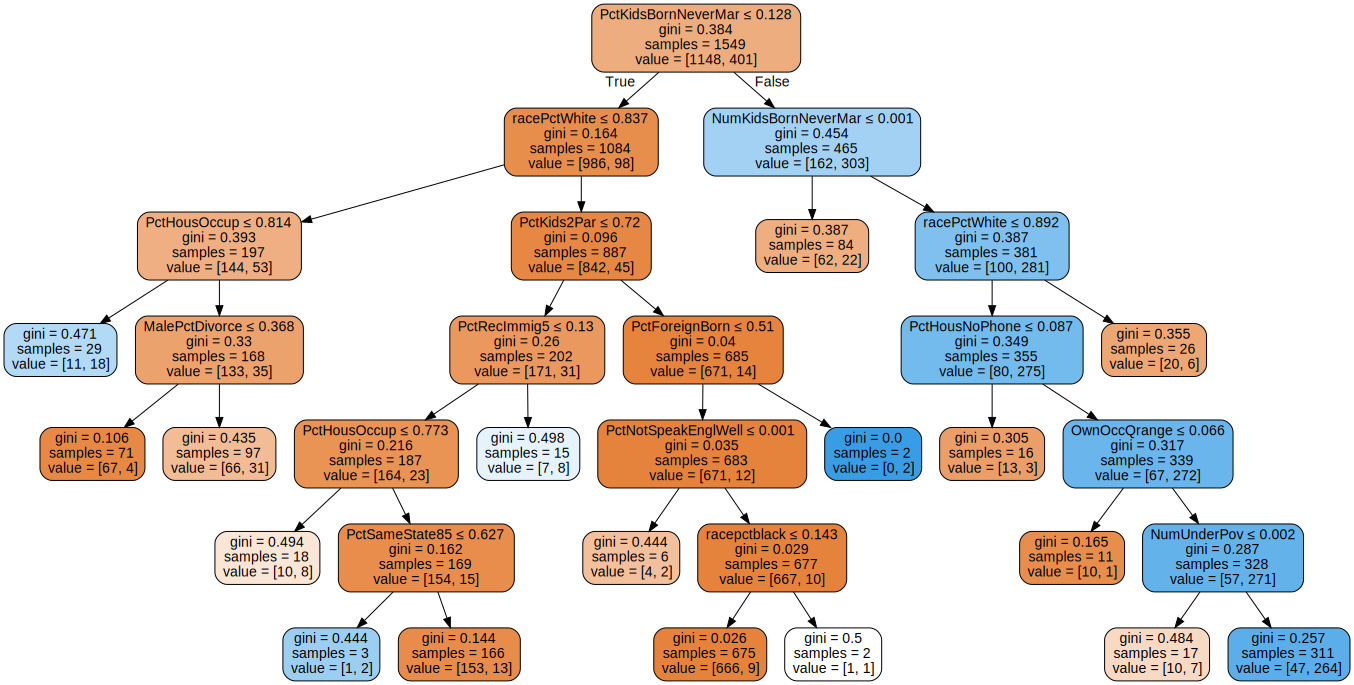

In [352]:
# Get the tree
import graphviz
import pandas as pd

features = []
df = pd.DataFrame(x_train)
for i in df[1:]:
    features.append(str(i))
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=features, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

code adapted from https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3

In [353]:
from sklearn.metrics import roc_curve, auc

scores ={}
x = list()
y = list()
error = list()

features = []
df = pd.DataFrame(x_train)
for i in df[1:]:
    features.append(str(i))

max_features = len(features)

for i in range(1, max_features): #first create a for loop for each max depth
    value_of_j = [] #this will take the average score for each value of k

    for j in range(2,10): #create a for loop for each kfold
        kf =KFold(n_splits=j, shuffle=True, random_state=42)
        score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=3, min_samples_split = 0.1, max_features=i), x_train, y_train, cv= kf, scoring="accuracy")
        value_of_j.append(score.mean())

    res = {str(i): value_of_j}
    scores.update(res) # for each max_depth, the average k_fold score

get_min_sample_split = scores

In [354]:
get_min_sample_split

{'1': [0.8166558306243228,
  0.7901753807246138,
  0.7456062361810384,
  0.7553084873160038,
  0.787584927119811,
  0.7857055504114328,
  0.7656542118476577,
  0.7753356932682111],
 '2': [0.806975077102609,
  0.7882448932671595,
  0.779221276539066,
  0.8063138114625744,
  0.7708115091836022,
  0.7869663457898751,
  0.8076057635810052,
  0.7843572164717479],
 '3': [0.8115103775943986,
  0.7676080448222953,
  0.8050344308585737,
  0.7933980582524273,
  0.802440314068221,
  0.7985784750490632,
  0.7927461139896373,
  0.8140244357813924],
 '4': [0.8263474201883805,
  0.7753537352745665,
  0.7753569620927568,
  0.7940745380519888,
  0.8114892300938813,
  0.8327888327888326,
  0.8024377704182469,
  0.812142462397873],
 '5': [0.8263290822705676,
  0.775973490471264,
  0.8192579717094222,
  0.7986136339910219,
  0.8089127333313378,
  0.799213240389711,
  0.8108908445061696,
  0.8101895416050544],
 '6': [0.813419188130366,
  0.8179356654121622,
  0.8186019872665761,
  0.8308633469046873,
  0.8

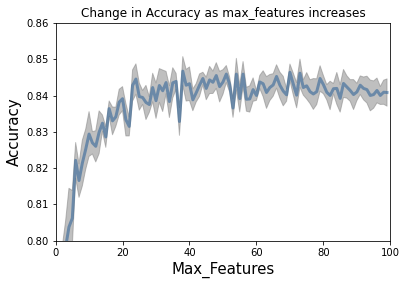

In [355]:
import numpy as np
import statistics 
x =[]
y =[]
error = []
for key, value in get_min_sample_split.items():
    x.append(key)
    y.append(sum(value)/len(value))
    error.append(statistics.stdev(value))
    
x = [round(float(i),2) for i in x]

y_above = []
y_below = []
for i in range(len(error)):
    y_above.append(y[i]+(error[i]*0.5))
    y_below.append(y[i]-(error[i]*0.5))
    
# plt.plot(x, error, 'or')
plt.plot(x, y, color=(0.2, 0.4, 0.6, 0.6), lw=3)
#plt.errorbar(x, y, yerr = error, barsabove = False, fmt='o', capsize=3, color='red')

#plt.fill_between(range(100), y-y_diff, y+y_diff, alpha=0.5)
#plt.errorbar(x, y, yerr = error, ls='-.', fmt='o', capsize=3)
plt.xlabel('Max_Features', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Change in Accuracy as max_features increases')
plt.ylim(0.8, 0.86)
plt.xlim(0,100)#plot the outputs

z1 = np.array(y_above)
z2 = np.array(y_below)

plt.fill_between(x,y_above,y_below,where=z1>=z2,color='grey',alpha=0.5, interpolate=True)


In [356]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

kf =KFold(n_splits=4, shuffle=True, random_state=42)
score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=9, min_samples_split = 0.6, ccp_alpha = 0.012, max_features = 100), x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [nan nan nan nan]
Average score: nan


C:\Users\Windows10Pro\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Windows10Pro\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Windows10Pro\anaconda3\envs\ml\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\Windows10Pro\anaconda3\envs\ml\lib\site-packages\sklearn\tree\_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\Windows10Pro\anaconda3\envs\ml\lib\site-packages\sklearn\base.py", line 429, in _validate_data
    X = check_array(X, **check_X_params)
  File "C:\Users\Windows10Pro\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    r

In [373]:
from sklearn.metrics import roc_curve, auc

scores ={}
x = list()
y = list()
error = list()

ccp_alpha_vals = np.arange(0,0.3,0.001)


for i in ccp_alpha_vals: #first create a for loop for each max depth
    value_of_j = [] #this will take the average score for each value of k

    for j in range(2,10): #create a for loop for each kfold
        kf =KFold(n_splits=j, shuffle=True, random_state=42)
        score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini',splitter = 'best', max_depth=3, min_samples_split = 0.1, max_features=100, ccp_alpha=i), x_train, y_train, cv= kf, scoring="accuracy")
        value_of_j.append(score.mean())

    res = {str(i): value_of_j}
    scores.update(res) # for each max_depth, the average k_fold score

get_min_sample_split = scores

(0.0, 0.15)

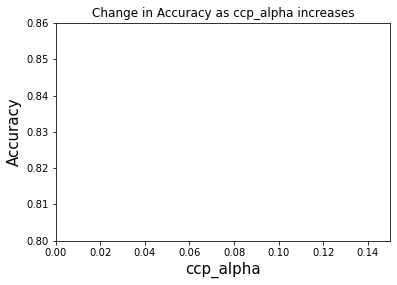

In [358]:
import numpy as np
import statistics 
x =[]
y =[]
error = []
for key, value in get_min_sample_split.items():
    x.append(key)
    y.append(sum(value)/len(value))
    error.append(statistics.stdev(value))
    
x = [round(float(i),2) for i in x]
    
# plt.plot(x, error, 'or')
plt.plot(x, y, color=(0.2, 0.4, 0.6, 0.6), lw=3)
#plt.errorbar(x, y, yerr = error, barsabove = False, fmt='o', capsize=3, color='red')
#plt.errorbar(x, y, yerr = error, ls='-.', fmt='o', capsize=3)
plt.xlabel('ccp_alpha', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Change in Accuracy as ccp_alpha increases')
plt.ylim(0.8, 0.86)
plt.xlim(0,0.15)#plot the outputs


**Build the Decision tree #2** - applying pre-pruning techniques

**K-Fold Classification** 
This will increase the number of times the test and train data is split, then will average out the accuracy scores. The cells below will increase the number of K up to 12, then plot the accuracy for the data.

(0.7, 0.9)

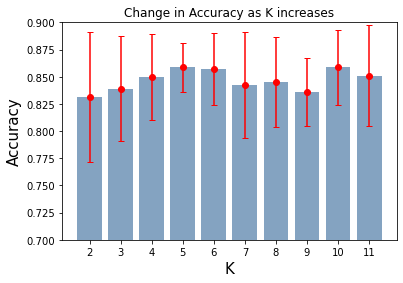

In [359]:
kfold_scores = {}
for i in range(2, 12):
    kf =KFold(n_splits=i, shuffle=True, random_state=42)
    score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=3, min_samples_split = 0.1, max_features=100, ccp_alpha=0.01), x_test, y_test, cv= kf, scoring="accuracy")
    res = {str(i):list(score)}
    kfold_scores.update(res)
    
import numpy as np
import statistics 
x =[]
y =[]
error = []
for key, value in kfold_scores.items():
    x.append(key)
    y.append(sum(value)/len(value))
    error.append(statistics.stdev(value))
    
xfit = np.linspace(0, 10, 1000)
# plt.plot(x, error, 'or')
plt.bar(x, y, color=(0.2, 0.4, 0.6, 0.6))
plt.errorbar(x, y, yerr = error, barsabove = False, fmt='o', capsize=3, color='red')
#plt.errorbar(x, y, yerr = error, ls='-.', fmt='o', capsize=3)
plt.xlabel('K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Change in Accuracy as K increases')
plt.ylim(0.7, 0.9)

In [360]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split = 0.1, max_features=100, ccp_alpha=0.01, splitter = 'best'), x_test, y_test, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.87969925 0.88721805 0.84210526 0.84210526 0.84210526]
Average score: 0.86


In [369]:
x_test.shape

(665, 100)

In [370]:
dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split = 0.1, max_features=100, ccp_alpha=0.01, splitter = 'best')
dt.fit(x_train, y_train)
y_train_predict = dt.predict(x_train)
y_test_predict = dt.predict(x_test)

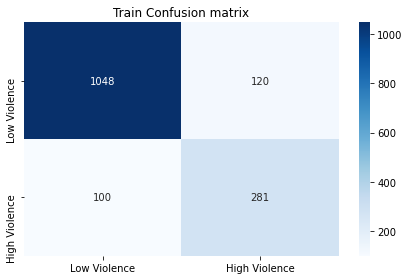

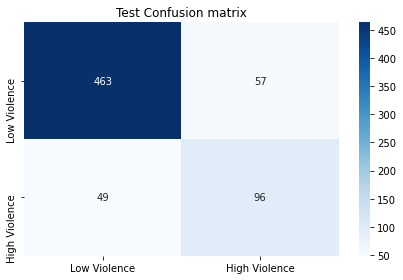

In [372]:
# Plot confusion matrix
def plot_confusionmatrix(train_p, train, dom):
    cf = confusion_matrix(train_p,train)
    sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues', fmt='g')
    plt.title(f'{dom} Confusion matrix')
    plt.tight_layout()
    # plt.savefig(f'{dom} Confusion matrix.png')
    plt.show()
    
plot_confusionmatrix(y_train_predict,y_train,dom='Train')
plot_confusionmatrix(y_test_predict,y_test,dom='Test')